In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# output all lines

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
df = pd.read_csv('gdrive/My Drive/learning/predict_number/data/train.csv')
test = pd.read_csv('gdrive/My Drive/learning/predict_number/data/test.csv')
sample = pd.read_csv('gdrive/My Drive/learning/predict_number/data/sample.csv')


In [5]:
df.head()
# test.head()

ID Tag  Reputation  Answers  Username    Views  Upvotes
0   52664   a      3942.0      2.0    155623   7855.0     42.0
1  327662   a     26046.0     12.0     21781  55801.0   1175.0
2  468453   c      1358.0      4.0     56177   8067.0     60.0
3   96996   a       264.0      3.0    168793  27064.0      9.0
4  131465   c      4271.0      4.0    112223  13986.0     83.0

In [6]:
df.shape
test.shape
df.Tag.unique()
df.describe()

(330045, 7)

(141448, 6)

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

ID    Reputation        Answers       Username         Views        Upvotes
count  330045.000000  3.300450e+05  330045.000000  330045.000000  3.300450e+05  330045.000000
mean   235748.682789  7.773147e+03       3.917672   81442.888803  2.964507e+04     337.505358
std    136039.418471  2.706141e+04       3.579515   49215.100730  8.095646e+04    3592.441135
min         1.000000  0.000000e+00       0.000000       0.000000  9.000000e+00       0.000000
25%    117909.000000  2.820000e+02       2.000000   39808.000000  2.594000e+03       8.000000
50%    235699.000000  1.236000e+03       3.000000   79010.000000  8.954000e+03      28.000000
75%    353620.000000  5.118000e+03       5.000000  122559.000000  2.687000e+04     107.000000
max    471493.000000  1.042428e+06      76.000000  175738.000000  5.231058e+06  615278.000000

In [0]:
# df.info()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install mpld3
import mpld3
mpld3.enable_notebook()


    100% |████████████████████████████████| 798kB 19.6MB/s 
  Running setup.py bdist_wheel for mpld3 ... - \ done
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


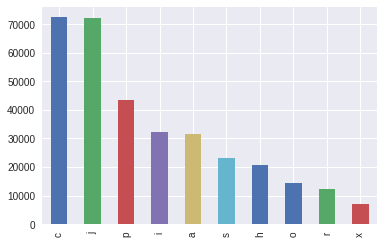

In [9]:
df.Tag.value_counts().plot(kind='bar')


In [10]:
# df.Tag.value_counts(normalize=True).plot(kind='bar')
df.Tag.value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

TypeError: ignored

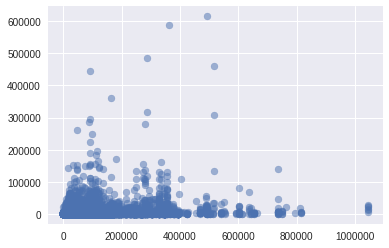

In [11]:
# plt.scatter(df.Upvotes,df.Views, alpha=0.5)
plt.scatter(df.Reputation,df.Upvotes, alpha=0.5)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


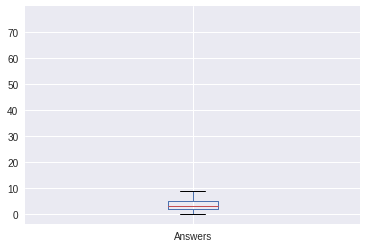

In [12]:
df.Answers.plot.box(grid='True')


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


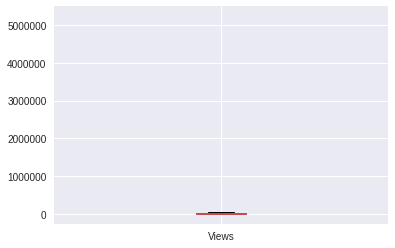

In [13]:
df.Views.plot.box(grid='True')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


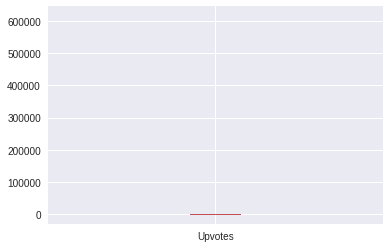

In [14]:
df.Upvotes.plot.box(grid='True')

In [15]:
corr = df.corr()
corr.style.background_gradient()

In [16]:
df.isnull().values.any()
df.isnull().sum().sum()


False

0

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [18]:
label_encoder = LabelEncoder()
temp = df.copy()
temp.iloc[:,1] = label_encoder.fit_transform(df.iloc[:,1])
temp.head()

ID  Tag  Reputation  Answers  Username    Views  Upvotes
0   52664    0      3942.0      2.0    155623   7855.0     42.0
1  327662    0     26046.0     12.0     21781  55801.0   1175.0
2  468453    1      1358.0      4.0     56177   8067.0     60.0
3   96996    0       264.0      3.0    168793  27064.0      9.0
4  131465    1      4271.0      4.0    112223  13986.0     83.0

In [0]:

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
# X = temp[["Reputation", "Upvotes" , "Answers" , "Views"]].values.astype(np.float64)
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit_transform(X)
# scaled_data = pd.DataFrame(min_max_scaler.fit_transform(X), columns=["Reputation", "Upvotes" , "Answers" , "Views"])
# scaled_data.head()

# temp.drop(columns=["Reputation", "Upvotes" , "Answers" , "Views"], axis=1,inplace=True)
# temp = pd.concat([temp, scaled_data], axis=1)


In [20]:
# df.head()
temp.tail()
# temp1.tail()

ID  Tag  Reputation  Answers  Username    Views  Upvotes
330040  339800    1        36.0      2.0     84919   1063.0      0.0
330041  253800    1      1649.0      2.0     76730  23319.0     73.0
330042  210756    1      6178.0      2.0     91701   2453.0     15.0
330043   56089    4        89.0      2.0     80245   2107.0      3.0
330044  300553    4      2001.0      4.0    154692   2554.0     37.0

In [21]:
onehot = pd.get_dummies(temp.iloc[:,1],  prefix='tag')
onehot.head()

tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  tag_9
0      1      0      0      0      0      0      0      0      0      0
1      1      0      0      0      0      0      0      0      0      0
2      0      1      0      0      0      0      0      0      0      0
3      1      0      0      0      0      0      0      0      0      0
4      0      1      0      0      0      0      0      0      0      0

In [22]:
temp = pd.concat([temp,onehot], axis = 1)
temp.head()

ID  Tag  Reputation  Answers  Username    Views  Upvotes  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  tag_9
0   52664    0      3942.0      2.0    155623   7855.0     42.0      1      0      0      0      0      0      0      0      0      0
1  327662    0     26046.0     12.0     21781  55801.0   1175.0      1      0      0      0      0      0      0      0      0      0
2  468453    1      1358.0      4.0     56177   8067.0     60.0      0      1      0      0      0      0      0      0      0      0
3   96996    0       264.0      3.0    168793  27064.0      9.0      1      0      0      0      0      0      0      0      0      0
4  131465    1      4271.0      4.0    112223  13986.0     83.0      0      1      0      0      0      0      0      0      0      0

In [0]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(categories='auto')
# X = temp[['Tag']]
# enc.fit(X)
# onehotlabels = enc.transform(X).toarray()
# onehotlabels.shape
# onehotlabels

In [0]:
import seaborn as sns


In [0]:
# sns.pairplot(temp, x_vars=['Reputation','Views','Answers'], y_vars='Upvotes', size=7, aspect=0.7, kind='reg')


In [26]:
temp.head()

ID  Tag  Reputation  Answers  Username    Views  Upvotes  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  tag_9
0   52664    0      3942.0      2.0    155623   7855.0     42.0      1      0      0      0      0      0      0      0      0      0
1  327662    0     26046.0     12.0     21781  55801.0   1175.0      1      0      0      0      0      0      0      0      0      0
2  468453    1      1358.0      4.0     56177   8067.0     60.0      0      1      0      0      0      0      0      0      0      0
3   96996    0       264.0      3.0    168793  27064.0      9.0      1      0      0      0      0      0      0      0      0      0
4  131465    1      4271.0      4.0    112223  13986.0     83.0      0      1      0      0      0      0      0      0      0      0

In [0]:
feature_cols = ['Reputation', 'Answers', 'Views']
X = temp[feature_cols]
y = temp[['Upvotes']]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(247533, 3)
(247533, 1)
(82512, 3)
(82512, 1)


In [30]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
print(linreg.intercept_)
print(linreg.coef_)

[-370.11285291]
[[ 3.46028144e-02 -4.84046199e+01  2.13161148e-02]]


In [37]:
# linreg.rsquared

list(zip(feature_cols, linreg.coef_))


[('Views', 0.020270474359591492), ('Reputation', 0.034299448947638284)]

In [0]:
y_pred = linreg.predict(X_test)


In [39]:
# RMSE 
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


2430.7056589955578


In [40]:
feature_cols = ['Views', 'Answers']

X = temp[feature_cols]
y = temp.Upvotes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

2560.1372320434584


In [41]:
feature_cols = ['Reputation', 'Answers']

X = temp[feature_cols]
y = temp.Upvotes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

2602.7634656555574


In [42]:
feature_cols = ['Views', 'Reputation']

X = temp[feature_cols]
y = temp.Upvotes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

2430.7056589955578
